In [60]:
%matplotlib inline
import numpy as np
import pandas as pd
import time
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
def timestamp_datetime(value):
    return time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(value))

def time_feat(df,featList,featName):
    scaler = StandardScaler()
    tmp = df.groupby(featList).size().reset_index().rename(columns={0:featName})
    tmp[featName] = scaler.fit_transform(tmp[featName].values.reshape(-1,1))
    df = df.merge(tmp,'left',on=featList)
    return df

def process(df):
    df['time'] = df.context_timestamp.apply(timestamp_datetime)
    df['day'] = df.time.apply(lambda x: int(x[8:10]))
    df['hour'] = df.time.apply(lambda x: int(x[11:13]))
    df['item_property_list_clean'] = df['item_property_list'].apply(lambda x:';'.join(sorted(set(str(x).split(';')))))
    df["missing_feat"] = np.sum((df == -1).values, axis=1)
    return df

In [6]:
trainFile = 'round1_ijcai_18_train_20180301.txt'
testFile = 'round1_ijcai_18_test_a_20180301.txt'
dataDir = '../../Data/advertisment/Raw/'

In [7]:
dfTrain = pd.read_table(dataDir+trainFile,sep=' ')
dfTrain.drop_duplicates(inplace=True)
dfTest = pd.read_table(dataDir+testFile,sep=' ')

dfTrain = process(dfTrain)
dfTest = process(dfTest)

In [ ]:
print(dfTest.user_id.nunique()*1.0/dfTest.shape[0])
print(dfTrain.user_id.nunique()*1.0/dfTrain.shape[0])

In [ ]:
1/(dfTest.user_id.nunique()*1.0/dfTest.shape[0])

In [ ]:
1/(dfTrain.user_id.nunique()*1.0/dfTrain.shape[0])

In [67]:
dfTest.item_category_list

0        7908382889764677758;8277336076276184272
1        7908382889764677758;5755694407684602296
2        7908382889764677758;5755694407684602296
3        7908382889764677758;5755694407684602296
4        7908382889764677758;5755694407684602296
5        7908382889764677758;5755694407684602296
6        7908382889764677758;4879721024980945592
7        7908382889764677758;2011981573061447208
8        7908382889764677758;2011981573061447208
9        7908382889764677758;2011981573061447208
10       7908382889764677758;2011981573061447208
11       7908382889764677758;2011981573061447208
12       7908382889764677758;2011981573061447208
13       7908382889764677758;5755694407684602296
14       7908382889764677758;7258015885215914736
15       7908382889764677758;7258015885215914736
16       7908382889764677758;7258015885215914736
17       7908382889764677758;7258015885215914736
18       7908382889764677758;7258015885215914736
19       7908382889764677758;7258015885215914736
20       79083828897

In [8]:
dfTest.user_id.value_counts().describe()

count    13573.000000
mean         1.353496
std          0.773679
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         14.000000
Name: user_id, dtype: float64

In [57]:
a = -0.31284*18371/np.log(10000*sys.float_info.epsilon)
print(a)
a/18371

214.180918932


0.011658642367424385

In [47]:
import sys
np.log(sys.float_info.epsilon)

-36.043653389117154

In [15]:
dfTest.user_id.value_counts().reset_index()

,index,user_id
0,3741933163364281047,14
1,2378130817739611310,10
2,9074337407986981987,10
3,3781443987745574924,9
4,6815490382216915985,9
5,158924594843327896,8
6,8352492318160826833,8
7,125010392819025001,8
8,4328165515385912871,8
9,609147935029197423,7


In [64]:
for i in dfTrain.day.unique():
    print(i)
    print('\n')
    tmp = dfTrain.loc[dfTrain.day==i]
    #tmp = tmp.merge(tmp.user_id.value_counts().reset_index(),'inner',left_on='user_id',right_on='index')
    tmp['rank'] = tmp.groupby('user_id')['context_timestamp'].rank(method='first')
    print(pd.concat([tmp.groupby('rank')['is_trade'].mean(),tmp.groupby('rank')['is_trade'].count()],axis=1))
    

18




C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


      is_trade  is_trade
rank                    
1.0   0.019829     37571
2.0   0.022209     17876
3.0   0.019134      9355
4.0   0.020715      5117
5.0   0.017329      2943
6.0   0.011699      1795
7.0   0.013746      1164
8.0   0.019868       755
9.0   0.014374       487
10.0  0.006250       320
11.0  0.031111       225
12.0  0.012987       154
13.0  0.018692       107
14.0  0.025316        79
15.0  0.030769        65
16.0  0.040000        50
17.0  0.027027        37
18.0  0.000000        29
19.0  0.000000        24
20.0  0.000000        17
21.0  0.062500        16
22.0  0.076923        13
23.0  0.000000        11
24.0  0.000000         8
25.0  0.125000         8
26.0  0.000000         7
27.0  0.000000         6
28.0  0.000000         4
29.0  0.000000         4
30.0  0.000000         3
31.0  0.000000         2
32.0  0.000000         2
33.0  0.000000         2
34.0  0.000000         1
35.0  0.000000         1
36.0  0.000000         1
37.0  0.000000         1
38.0  0.000000         1


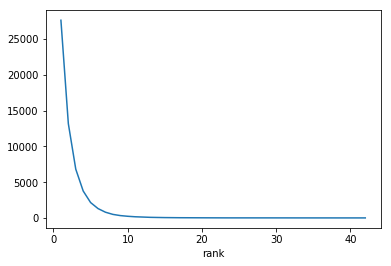

In [65]:
tmp.groupby('rank')['is_trade'].count().plot()

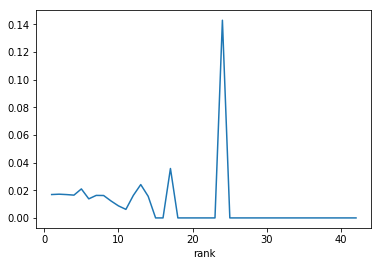

In [66]:
tmp.groupby('rank')['is_trade'].mean().plot()

In [42]:
import config
dfTrain.loc[dfTrain['rank']==4.5].sort_values('user_id')[config.KEYS]

,instance_id,user_id,context_id,is_trade,shop_id,item_id
319111,6972641605956643807,1108802291709389,255479181008939337,0,1239481181711478081,1905766490416385468
303389,2623021659583863671,1108802291709389,4421198548591879133,0,4215742678121737516,7905777711208821810
154274,4449817166848739883,3429901720320443,1663988093633409244,0,9097711841909151243,3179984039007626624
173695,207692248099468426,3429901720320443,6908723738597390241,0,5350752013283652541,2325471094288761937
85609,3961258743330254850,6479069294951341,4849683140089011321,0,8869928918103994831,2059761548914573888
132104,3645003564444734219,6479069294951341,7046520968873114387,0,180517674994060018,6273526786735435451
409947,8442957451076569732,7282804772464754,3181109850474646096,0,6542789075596109129,739506185801954299
395200,2707193953477213951,7282804772464754,4720439241410888161,0,6805239665516281082,4213701230604253888
386122,5719230610368428277,12348188411472844,706323685789247531,0,2972524860772192954,60128048339807666
403962,1720646691824973838,12348188411472844,4740774965047636087,0,1721151544806679388,3244354182795079311


In [26]:
dfTrain.drop_duplicates(['context_id','context_timestamp']).shape

(478111, 32)

In [29]:
dfTrain.context_timestamp.nunique()

281824

In [ ]:
count = CountVectorizer(ngram_range=(1,1))
tt =count.fit_transform(dfTrain['item_property_list'].apply(lambda x: x.replace(';',' ')))

In [ ]:
dfTrain['item_property_list'].apply(lambda x:';'.join(sorted(set(x.split(';'))))).value_counts()

In [ ]:
def string_process(df):
    

In [ ]:
grouped = dfTrain.groupby(['context_page_id'])

grouped['is_trade'].agg('mean').sort_index(ascending=True)

In [ ]:
dfTrain.loc[dfTrain['user_id']==5730330586479721983]

In [ ]:
tt.data.max()

In [ ]:
dfTrain.dtypes

In [ ]:
dfTrain.head(5)

In [ ]:
dfTrain['predict_category_property_bin'] = dfTrain['predict_category_property'].apply(lambda x: x.count(';'))
dfTrain['predict_category_property_bin'].describe()

In [ ]:
dfTrain.loc[dfTrain['predict_category_property_bin']==0,'predict_category_property']

In [ ]:
for i in range(3):
    print(dfTrain['item_category_list_bin_%d'%i].unique())

In [ ]:
tt = np.array(';'.join(dfTrain['item_property_list'].tolist()).split(';'))

In [ ]:
np.unique(tt).shape

In [ ]:
dfTrain['shop_id'].value_counts()[dfTrain['shop_id'].value_counts()>1].index

In [ ]:
dfTrain.loc[dfTrain['user_id']==7201324926905945581,'is_trade']

In [ ]:
def timestamp_datetime(value):
    format = '%Y-%m-%d %H:%M:%S'
    value = time.localtime(value)
    dt = time.strftime(format, value)
    return dt

dfTrain['context_timestamp_date'] = dfTrain['context_timestamp'].map(timestamp_datetime).apply(lambda x: x[:10])
dfTest['context_timestamp_date'] = dfTest['context_timestamp'].map(timestamp_datetime).apply(lambda x: x[:10])

In [ ]:
dfTrain['context_timestamp_date'].value_counts()

In [ ]:
dfTrain.groupby(['context_timestamp_date'])['is_trade'].mean()

In [ ]:
print(dfTrain['context_timestamp_date'].max())
print(dfTrain['context_timestamp_date'].min())
print(dfTest['context_timestamp_date'].max())
print(dfTest['context_timestamp_date'].min())

In [ ]:
dfTest.shape

In [ ]:
for i in dfTrain['predict_category_property'].tolist()[:10]:
    tmpDict ={}
    for j in i.split(';'):
        m,n = j.split(':')
        tmpDict[m] = n.split(',')

In [ ]:
def dictgen(i):
    tmpDict ={}
    for j in i.split(';'):
        try:
            m,n = j.split(':')
            '''if not '-1' in n.split(','):
                tmpDict[m] = len(n.split(','))'''
            tmpDict[m] = len(n.split(',')) if not '-1' in n.split(',') else -1
        except: 
                tmpDict ={'-1':'-1'}
    return tmpDict

In [ ]:
dfTrain['predict_category_property_dict'] = dfTrain['predict_category_property'].map(dictgen)

In [ ]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=True)
X = v.fit_transform(dfTrain['predict_category_property_dict'].tolist())
X.shape

In [ ]:
dfTrain['predict_category_property_dict'].tolist()[0:10]

In [ ]:
idTrain = set(dfTrain.user_id.unique().tolist())
idTest = set(dfTest.user_id.unique().tolist())

In [ ]:
print(len(idTrain))
print(len(idTest))
print(len(idTrain&idTest))


In [ ]:
dfTrain.shape

In [ ]:
dfTest.shape

In [ ]:
np.log(0.95)

In [ ]:
1.5/180000